<a href="https://colab.research.google.com/github/JamalMorales/PDI/blob/main/PR%C3%81CTICAS%20PDI/Pr%C3%A1ctica_7_PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cargamos la libreria de Github para tener acceso a nuestras imagenes primero**


In [11]:
!git clone https://github.com/JamalMorales/PDI.git
%cd PDI
!ls -R

Cloning into 'PDI'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 62 (delta 9), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (62/62), 3.27 MiB | 15.06 MiB/s, done.
Resolving deltas: 100% (9/9), done.
/content/PDI/PDI/PDI
.:
 IMAGENES  'PRÁCTICAS PDI'   README.md

./IMAGENES:
 contraste.jpg	 frutas.jpg  'molletes con su pikito asi bien delicioso.jpg'
 flor.jpg	 medica.jpg   tumor.jpg

'./PRÁCTICAS PDI':
Práctica_3_PDI.ipynb  Práctica_4_PDI.ipynb  Práctica_5_PDI.ipynb


# **Despues cargamos nuestro código correspondiente**

Pesos óptimos: [0.33 0.33 0.34]


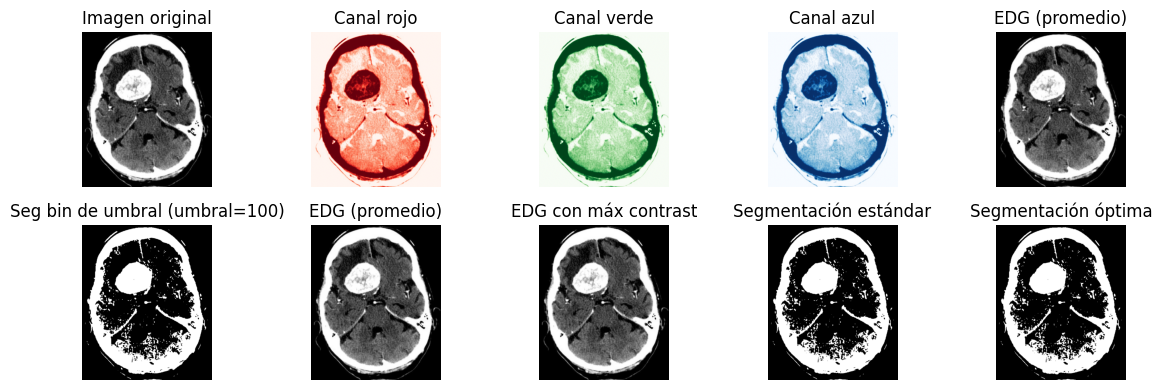

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.optimize import minimize

#Jamal Morales Sánchez 2064497
#Evelyn Rubí Martinez Ruiz 2071292
#Abigail Montserrat Nieto Solís 2059067
#Reynaldo Holsen Gallegos González	1963727
#Jesús Antonio Segura Vences	1851396

#carga de imágenes
img = cv2.imread('IMAGENES/tumor.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Separar canales
R,G,B = img_rgb[:,:,0], img_rgb[:,:,1], img_rgb[:,:,2]

#Conversión a grises
gray_avg = ((R.astype(np.float32)+G+B)/3).astype(np.uint8)

umbral = 100
_, segmentada = cv2.threshold(gray_avg, umbral, 255, cv2.THRESH_BINARY)

#Normalizar valores
R_norm = R.astype(np.float32)/255
G_norm = G.astype(np.float32)/255
B_norm = B.astype(np.float32)/255

#Función objetivo
def grayscale_variance(weights):
    w_r, w_g, w_b = weights
    gray = w_r * R_norm + w_g * G_norm + w_b * B_norm
    gray_normalized = (gray-gray.min())/(gray.max()-gray.min())
    return -np.var(gray_normalized)

constraints=({'type':'eq','fun': lambda w: np.sum(w)-1})
bounds = [(0,1),(0,1),(0,1)]
initial_weights = [0.33,0.33,0.34]
result = minimize(grayscale_variance, initial_weights, method = 'SLSQP',bounds=bounds,constraints=constraints)

optimal_weight=result.x
print("Pesos óptimos:", optimal_weight)

gray_optimal         = optimal_weight[0]*R_norm+optimal_weight[1]*G_norm+optimal_weight[2]*B_norm
gray_optimal = (gray_optimal*255).astype(np.uint8)

#Umbral
_, seg_standard = cv2.threshold(gray_avg, umbral, 255, cv2.THRESH_BINARY)
_, seg_optimal = cv2.threshold(gray_optimal,umbral,255,cv2.THRESH_BINARY)

#Mostrar canales por separado
plt.figure(figsize=(12,4))
plt.subplot(2,5,1)
plt.imshow(img_rgb)
plt.title('Imagen original')
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(R, cmap='Reds')
plt.title('Canal rojo')
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(G, cmap='Greens')
plt.title('Canal verde')
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(B, cmap='Blues')
plt.title('Canal azul')
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(gray_avg, cmap='gray')
plt.title('EDG (promedio)')
plt.axis('off')

plt.subplot(2,5,6)
plt.imshow(segmentada,cmap='gray')
plt.title('Seg bin de umbral (umbral=100)')
plt.axis('off')

plt.subplot(2,5,7)
plt.imshow(gray_avg, cmap='gray')
plt.title('EDG (promedio)')
plt.axis('off')

plt.subplot(2,5,8)
plt.imshow(gray_optimal, cmap='gray')
plt.title('EDG con máx contrast')
plt.axis('off')

plt.subplot(2,5,9)
plt.imshow(seg_standard, cmap='gray')
plt.title('Segmentación estándar')
plt.axis('off')

plt.subplot(2,5,10)
plt.imshow(seg_optimal, cmap='gray')
plt.title('Segmentación óptima')
plt.axis('off')

plt.tight_layout()
plt.show()

# **Calculamos ahora el área de nuestra tomografía de interes**

In [10]:
# Cálculo del área del tumor segmentado (en píxeles)
area_estandar = np.sum(seg_standard == 255)
area_optima = np.sum(seg_optimal == 255)

# Resolución espacial (ejemplo: cada píxel representa 0.2 mm)
resolucion_mm_por_pixel = 0.2

# Conversión a milímetros cuadrados
area_estandar_mm2 = area_estandar * (resolucion_mm_por_pixel ** 2)
area_optima_mm2 = area_optima * (resolucion_mm_por_pixel ** 2)

# Impresión de resultados
print("Área del tumor segmentado (segmentación estándar):", area_estandar, "píxeles")
print("Área del tumor segmentado (segmentación estándar):", area_estandar_mm2, "mm²")
print("Área del tumor segmentado (segmentación óptima):", area_optima, "píxeles")
print("Área del tumor segmentado (segmentación óptima):", area_optima_mm2, "mm²")


Área del tumor segmentado (segmentación estándar): 94945 píxeles
Área del tumor segmentado (segmentación estándar): 3797.8000000000006 mm²
Área del tumor segmentado (segmentación óptima): 94945 píxeles
Área del tumor segmentado (segmentación óptima): 3797.8000000000006 mm²
